In [1]:
from processing.processor import *
from analysis.stdanalysis import *
from analysis.analysis import *
import numpy as np
from scipy.spatial.distance import cdist, pdist
import seaborn as sns

# Analysis complexes

In [2]:
p = CifProcessor()
p.read_pkl_metainfo()
p.read_pkl(mode='rg', folder='data/processed/')

  3%|███▍                                                                                                              | 17/557 [00:00<00:03, 163.42it/s]

Reading files with generic numbers on receptors and gproteins.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:04<00:00, 133.92it/s]


In [3]:
f_gio = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gi/o', gprotein=True)
fuf = f_gio[f_gio['PDB']=='6FUF']
f_gio = f_gio[f_gio['Method']!='X-ray']
# Combine with 6FUF
f_gio = f_gio.append(fuf).reset_index(drop=True)
print("Number of samples in complex with G_i/o:", len(f_gio))

Number of samples in complex with G_i/o: 35


In [4]:
f_gs = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gs', gprotein=True)
print("Number of samples in complex with G_s:", len(f_gs))

Number of samples in complex with G_s: 33


In [5]:
f_q11 = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gq/11', gprotein=True)
print("Number of samples in complex with G_qq/11:", len(f_q11))

Number of samples in complex with G_qq/11: 4


In [6]:
f_tot = pd.concat([f_gio, f_gs, f_q11]).reset_index(drop=True)

In [7]:
p.apply_filter(f_tot)

In [8]:
filtered_indices_q11 = [x for x in p.get_dfl_indices(list(f_q11['PDB'])) if x != None]
filtered_indices_gs = [x for x in p.get_dfl_indices(list(f_gs['PDB'])) if x != None]
filtered_indices_gio = [x for x in p.get_dfl_indices(list(f_gio['PDB'])) if x != None]

In [9]:
l = [filtered_indices_gio, filtered_indices_gs, filtered_indices_q11]

## Distances

In [10]:
A = StdAnalysisComplexes(P=p)
len(A.P.dfl)

72

In [11]:
A.run_dist_analysis(l=[filtered_indices_gs], query_tag='gs', poi=('G.H5.19', 7.58), eps=0.05)

In [12]:
dfs_gs = A.make_overview_df()

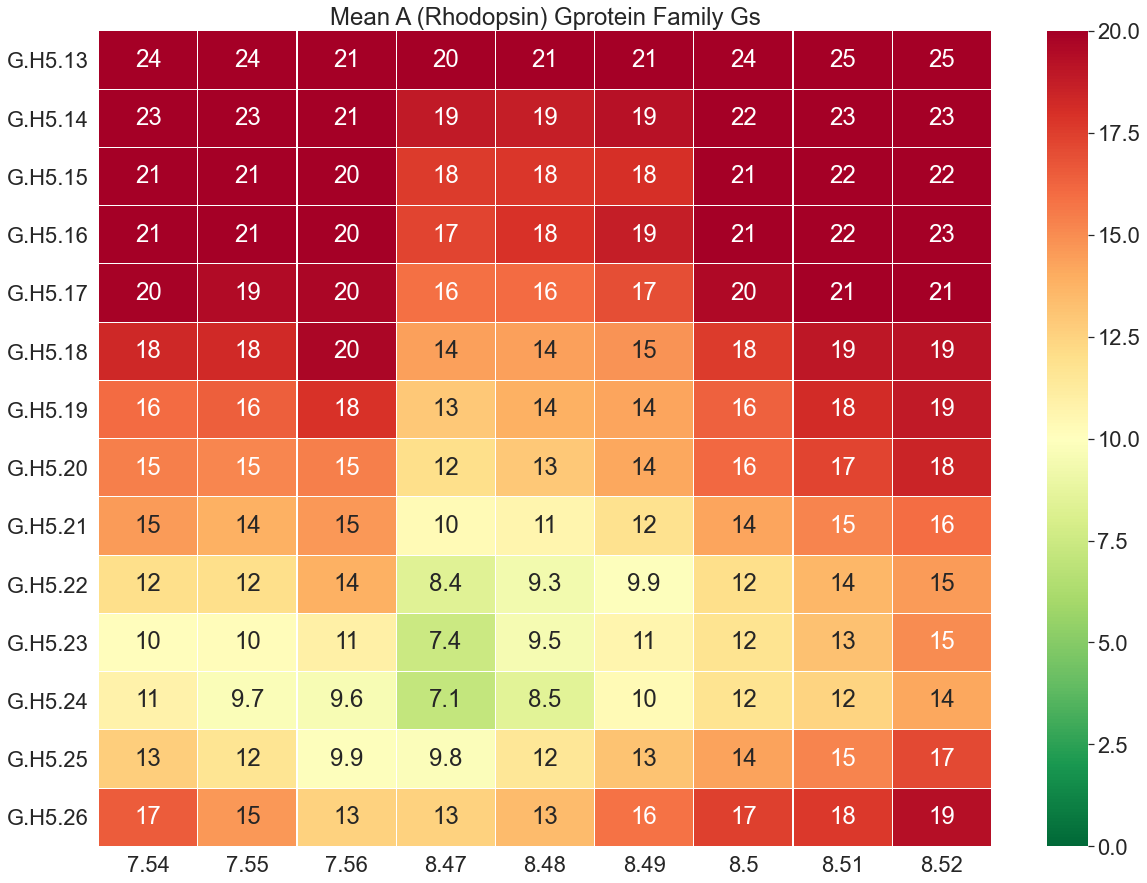

In [32]:
make_overview_plots(dfs_gs[1].loc['G.H5.13':, :8.52], 
                    title='Mean', cl='A (Rhodopsin)', gprot='Gprotein Family Gs', 
                    figsize=(8, 5), path='plots/mt/', show=False, save=True,
                    dpi=600)

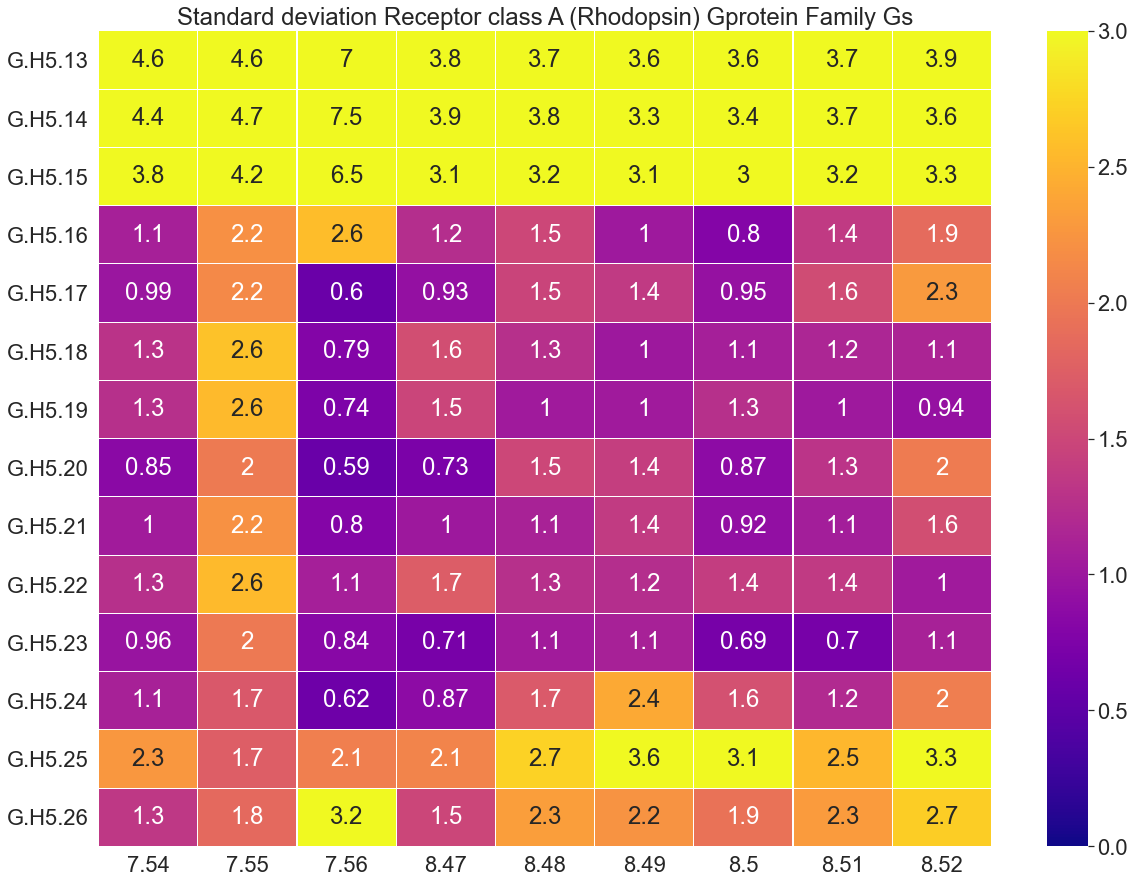

In [33]:
make_overview_plots(dfs_gs[2].loc['G.H5.13':, :8.52], 
                    title='Standard deviation', cl='Receptor class A (Rhodopsin)', gprot='Gprotein Family Gs', 
                    figsize=(8, 5), path='plots/mt/', show=False, save=True,
                    dpi=600, dmax=3, cmap='plasma')

In [34]:
len(A.dist_df_dict)

0

In [35]:
del A
A = StdAnalysisComplexes(P=p)
A.run_dist_analysis(l=[filtered_indices_gio], query_tag='gio', poi=('G.H5.19', 7.58), eps=0.05)

In [36]:
dfs_gio = A.make_overview_df()

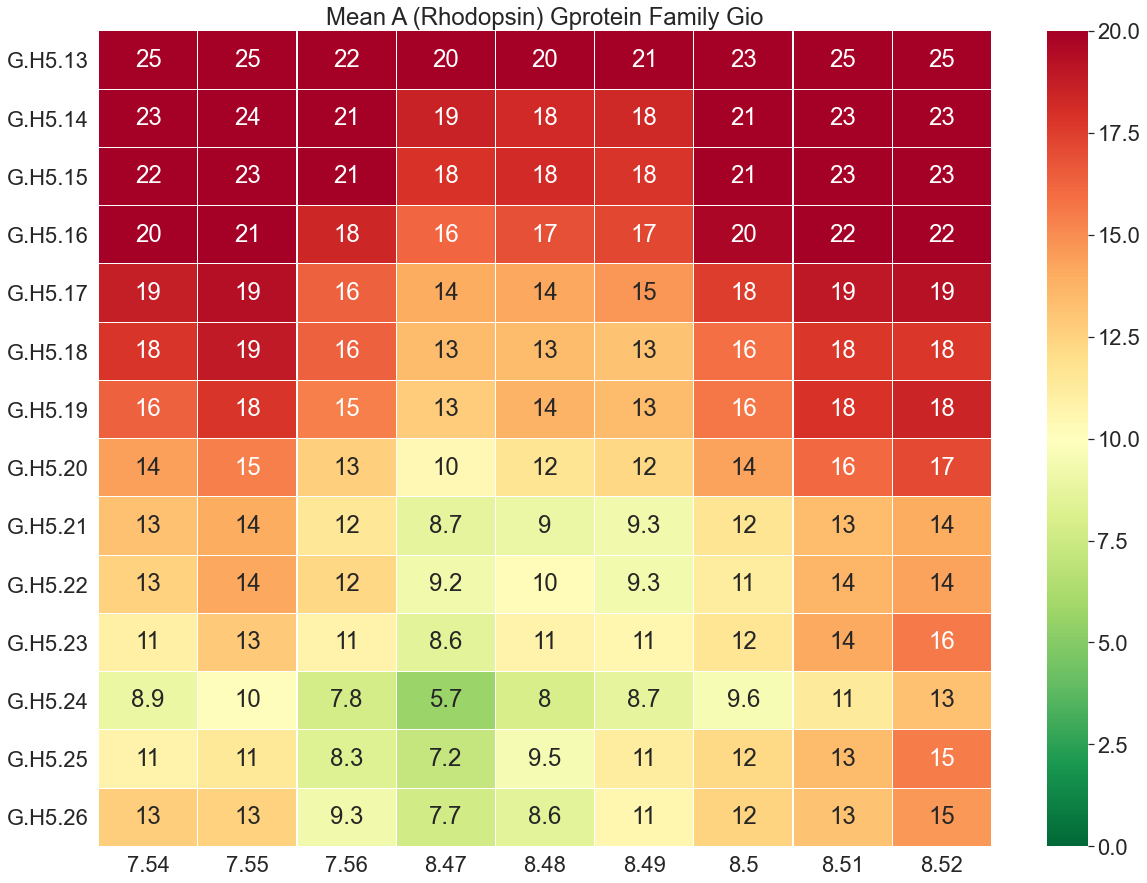

In [37]:
make_overview_plots(dfs_gio[1].loc['G.H5.13':, :8.52], 
                    title='Mean', set_title=False, cl='A (Rhodopsin)', gprot='Gprotein Family Gio', 
                    figsize=(8, 5), path='plots/mt/', show=False, save=True,
                    dpi=600)

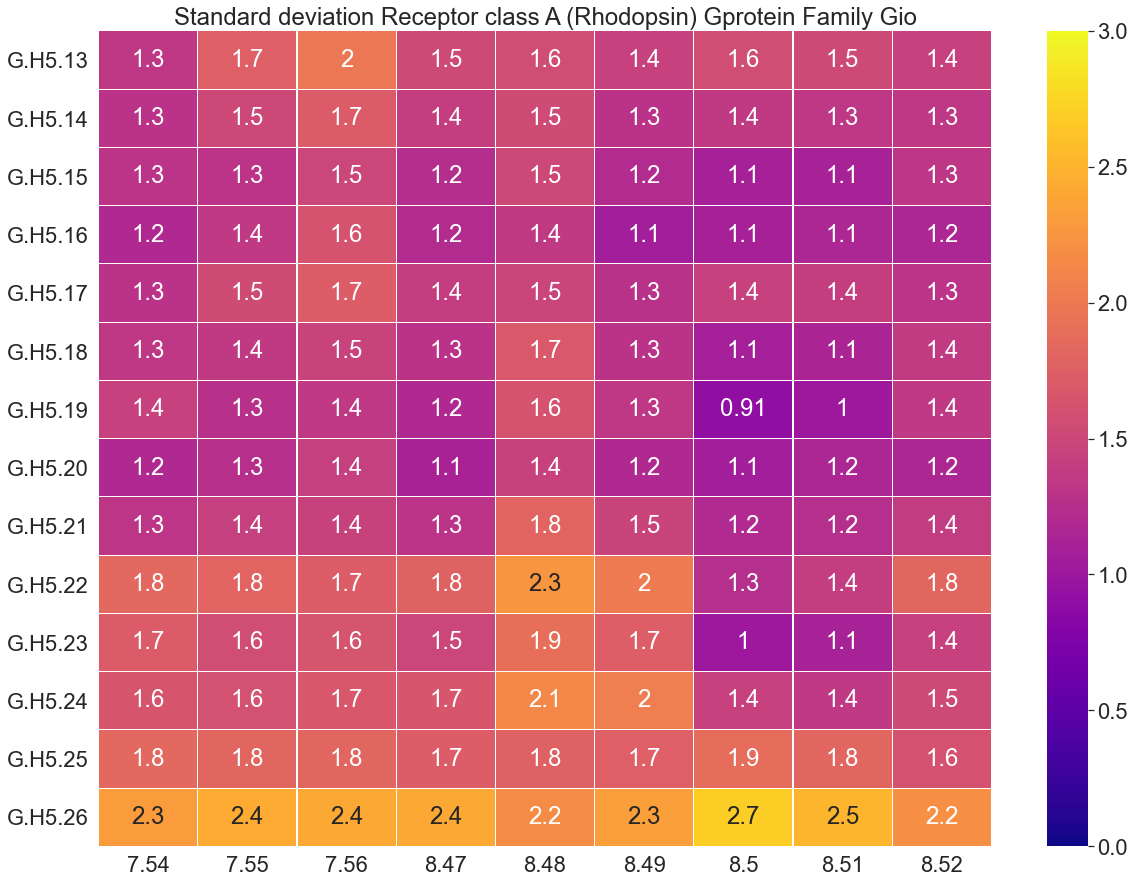

In [38]:
make_overview_plots(dfs_gio[2].loc['G.H5.13':, :8.52], 
                    title='Standard deviation', cl='Receptor class A (Rhodopsin)', gprot='Gprotein Family Gio', 
                    figsize=(8, 5), path='plots/mt/', show=False, save=True,
                    dpi=600, dmax=3, cmap='plasma')

In [39]:
len(A.dist_df_dict)

26

In [40]:
del A
A = StdAnalysisComplexes(P=p)
A.run_dist_analysis(l=[filtered_indices_q11], query_tag='gq11', poi=('G.H5.19', 7.58), eps=0.05)

In [41]:
dfs_gq11 = A.make_overview_df()

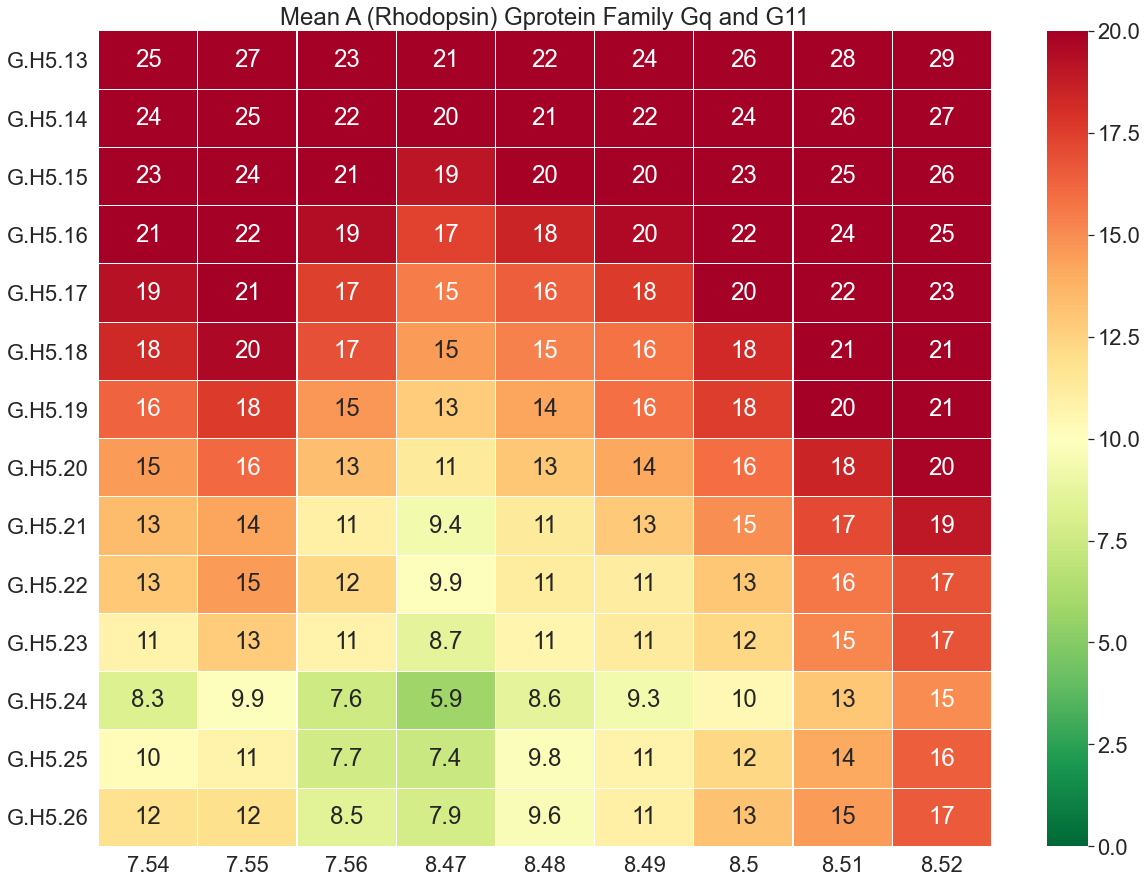

In [42]:
make_overview_plots(dfs_gq11[1].loc['G.H5.13':, :8.52], 
                    title='Mean', cl='A (Rhodopsin)', gprot='Gprotein Family Gq and G11', 
                    figsize=(8, 5), path='plots/mt/', show=False, save=True,
                    dpi=600)

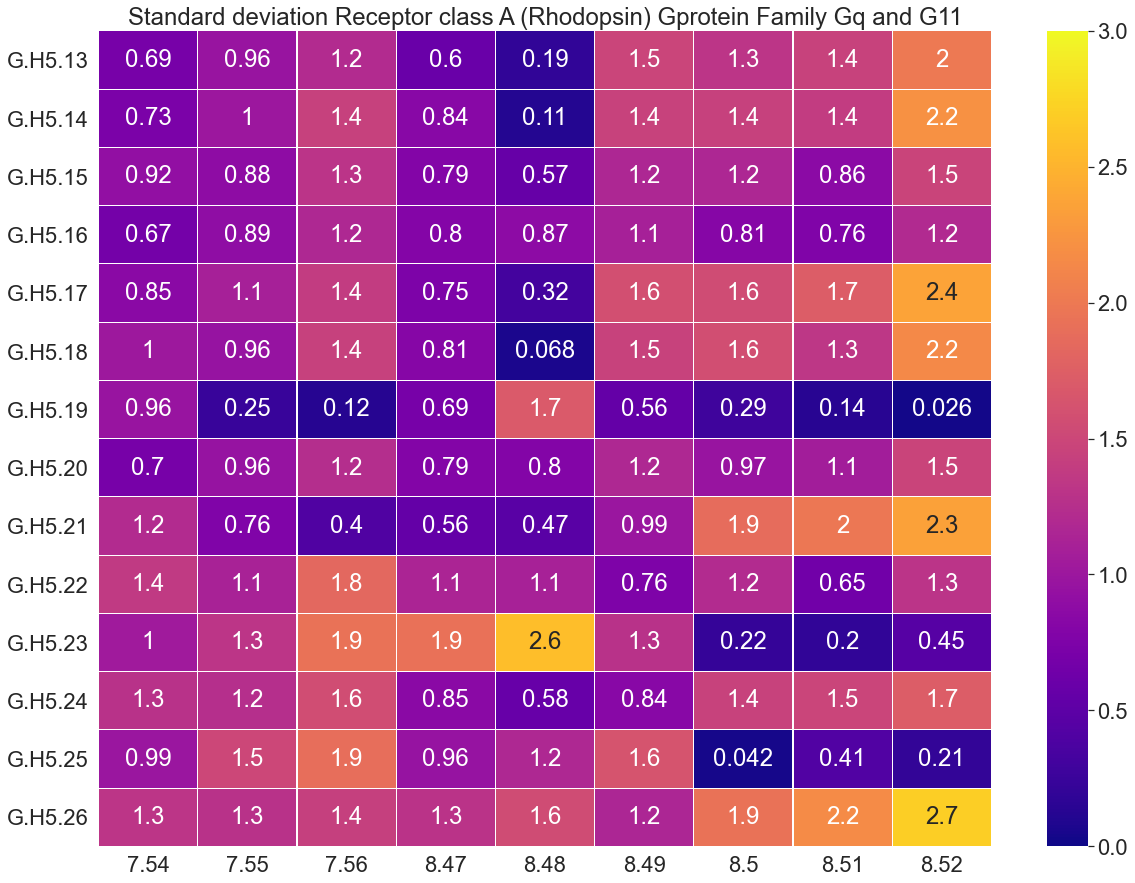

In [43]:
make_overview_plots(dfs_gq11[2].loc['G.H5.13':, :8.52], 
                    title='Standard deviation', cl='Receptor class A (Rhodopsin)', gprot='Gprotein Family Gq and G11', 
                    figsize=(8, 5), path='plots/mt/', show=False, save=True,
                    dpi=600, dmax=3, cmap='plasma')

In [25]:
len(A.dist_df_dict)

3

## Helix angles

In [139]:
def get_mask(df):
    for i in range(len(df)):
        col = list(df.columns)[i]
        df.loc[col, col] = 0.
    mask = np.zeros(df.values.shape,dtype='bool')
    mask[np.triu_indices(len(A.helical_angles_mean))] = True
    return mask

### gio

In [160]:
p = CifProcessor()
p.read_pkl_metainfo()
p.read_pkl(mode='rg', folder='data/processed/')
f_gio = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gi/o', gprotein=True)
fuf = f_gio[f_gio['PDB']=='6FUF']
f_gio = f_gio[f_gio['Method']!='X-ray']
# Combine with 6FUF
f_gio = f_gio.append(fuf).reset_index(drop=True)
print("Number of samples in complex with G_i/o:", len(f_gio))
p.apply_filter(f_gio)
del A
A = StdAnalysisComplexes(P=p)
A.run_helical_analysis()
mask = get_mask(A.helical_angles_mean)

  3%|███▎                                                                                                              | 16/557 [00:00<00:03, 152.35it/s]

Reading files with generic numbers on receptors and gproteins.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:03<00:00, 145.61it/s]


Number of samples in complex with G_i/o: 35


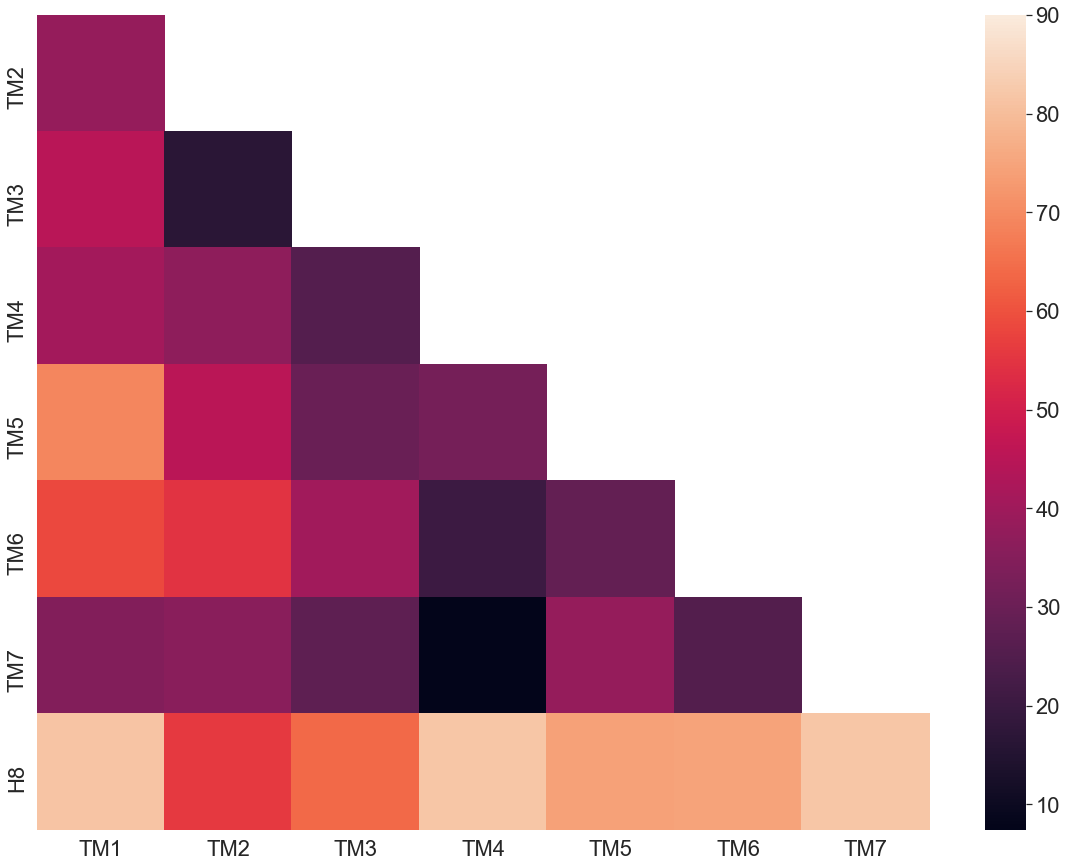

In [164]:
with sns.axes_style("white"):
    ax = sns.heatmap(A.helical_angles_mean.astype(float).loc['TM2':, :'TM7'], mask=mask[1:, :-1], vmax=90, square=False)

In [162]:
A.helical_angles_mean

,TM1,TM2,TM3,TM4,TM5,TM6,TM7,H8
TM1,0.0,38.137677,45.117318,40.939798,69.249379,58.401845,34.530298,81.417704
TM2,38.137677,0.0,16.467058,36.769586,45.349765,54.800146,36.030056,56.107502
TM3,45.117318,16.467058,0.0,25.611045,29.954459,40.47176,27.622599,63.899548
TM4,40.939798,36.769586,25.611045,0.0,31.928548,20.553265,7.385344,81.739333
TM5,69.249379,45.349765,29.954459,31.928548,0.0,28.450892,38.151169,74.32537
TM6,58.401845,54.800146,40.47176,20.553265,28.450892,0.0,25.321667,74.789796
TM7,34.530298,36.030056,27.622599,7.385344,38.151169,25.321667,0.0,81.796247
H8,81.417704,56.107502,63.899548,81.739333,74.32537,74.789796,81.796247,0.0


### gs

In [148]:
p = CifProcessor()
p.read_pkl_metainfo()
p.read_pkl(mode='rg', folder='data/processed/')
f_gs = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gs', gprotein=True)
print("Number of samples in complex with G_s:", len(f_gs))
p.apply_filter(f_gs)
del A
A = StdAnalysisComplexes(P=p)
A.run_helical_analysis()
mask = get_mask(A.helical_angles_mean.loc['TM2':, :'H8'])

  3%|███▎                                                                                                              | 16/557 [00:00<00:03, 152.35it/s]

Reading files with generic numbers on receptors and gproteins.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:03<00:00, 144.61it/s]


Number of samples in complex with G_s: 33


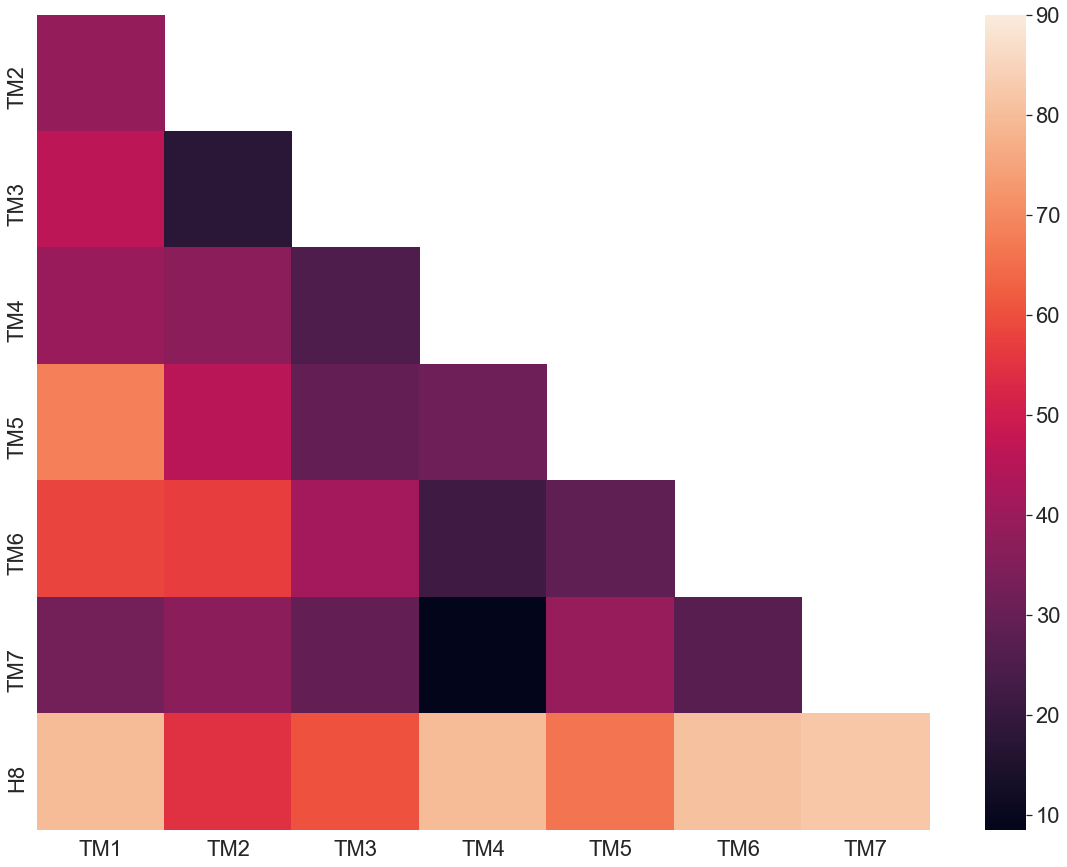

In [156]:
with sns.axes_style("white"):
    ax = sns.heatmap(A.helical_angles_mean.astype(float).loc['TM2':, :'TM7'], mask=mask[1:, :-1], vmax=90, square=False)

In [167]:
fig = ax.get_figure()
fig.savefig("output.png")

In [145]:
A.helical_angles_mean

,TM1,TM2,TM3,TM4,TM5,TM6,TM7,H8
TM1,0.0,38.921913,46.201423,39.858065,68.056645,58.293821,32.446604,79.677008
TM2,38.921913,0.0,17.60071,36.884335,45.419106,56.959454,37.025285,54.831316
TM3,46.201423,17.60071,0.0,25.24665,29.272634,41.807263,29.222101,60.407103
TM4,39.858065,36.884335,25.24665,0.0,31.449158,21.967816,8.456283,79.641884
TM5,68.056645,45.419106,29.272634,31.449158,0.0,28.675837,39.121398,66.419015
TM6,58.293821,56.959454,41.807263,21.967816,28.675837,0.0,26.951167,80.834023
TM7,32.446604,37.025285,29.222101,8.456283,39.121398,26.951167,0.0,82.333567
H8,79.677008,54.831316,60.407103,79.641884,66.419015,80.834023,82.333567,0.0


### gq11 

In [157]:
p = CifProcessor()
p.read_pkl_metainfo()
p.read_pkl(mode='rg', folder='data/processed/')
f_q11 = p.make_filter(State='Active', Cl='Rhodopsin', Family='Gq/11', gprotein=True)
print("Number of samples in complex with G_s:", len(f_q11))
p.apply_filter(f_q11)
del A
A = StdAnalysisComplexes(P=p)
A.run_helical_analysis()
mask = get_mask(A.helical_angles_mean.loc['TM2':, :'H8'])

  3%|███▎                                                                                                              | 16/557 [00:00<00:03, 148.12it/s]

Reading files with generic numbers on receptors and gproteins.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 557/557 [00:03<00:00, 140.27it/s]


Number of samples in complex with G_s: 4


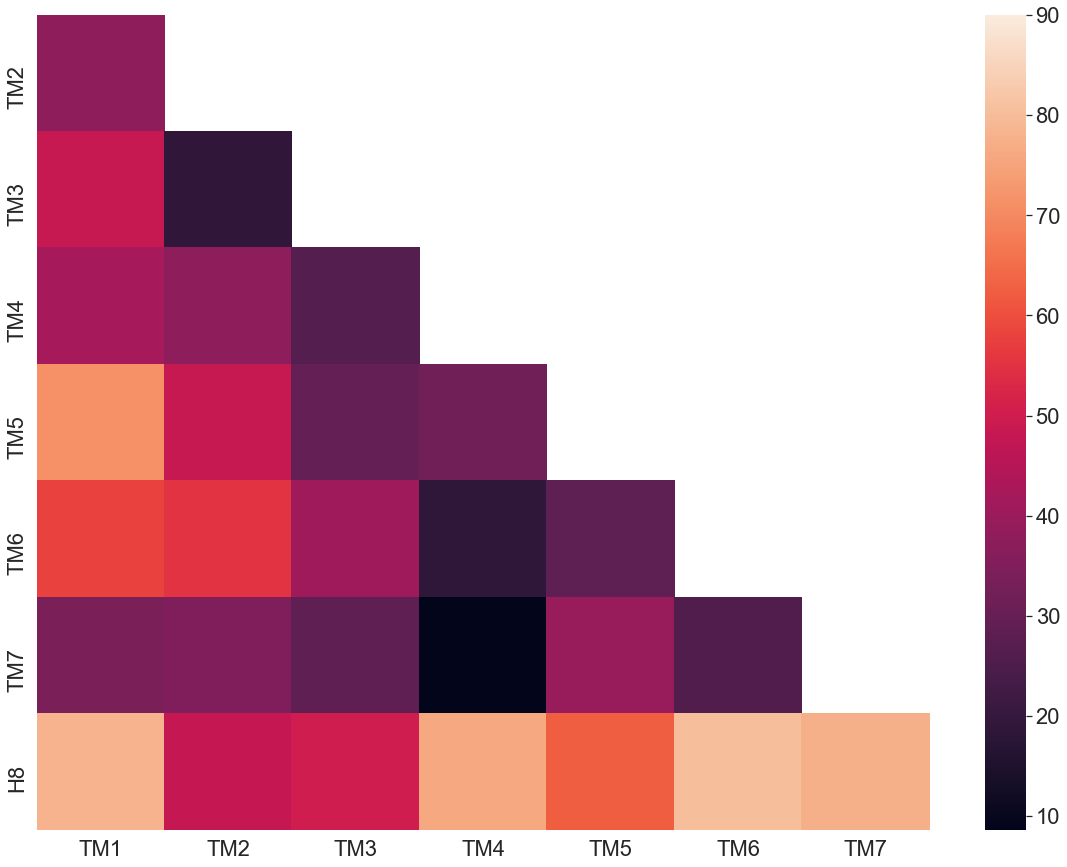

In [158]:
with sns.axes_style("white"):
    ax = sns.heatmap(A.helical_angles_mean.astype(float).loc['TM2':, :'TM7'], mask=mask[1:, :-1], vmax=90, square=False)

In [159]:
A.helical_angles_mean

,TM1,TM2,TM3,TM4,TM5,TM6,TM7,H8
TM1,NaN,37.688323,48.448884,42.243169,71.53043,58.150984,34.153623,77.936482
TM2,37.688323,NaN,19.026833,37.531464,48.560875,55.054036,34.844622,48.189833
TM3,48.448884,19.026833,NaN,26.650623,29.64082,40.523564,28.679745,50.097683
TM4,42.243169,37.531464,26.650623,NaN,31.908303,18.700668,8.584551,76.038036
TM5,71.53043,48.560875,29.64082,31.908303,NaN,28.567734,39.519653,62.356058
TM6,58.150984,55.054036,40.523564,18.700668,28.567734,NaN,25.501462,80.410023
TM7,34.153623,34.844622,28.679745,8.584551,39.519653,25.501462,NaN,77.390418
H8,77.936482,48.189833,50.097683,76.038036,62.356058,80.410023,77.390418,NaN
